## Transformation Features

why Transormation of features are Requried ?

## Standarsization

Standardization comes into picture when features of input datadet have large differences between their ranges, or simply when they are measured in different measurements units(eg: Pounds,Meters,Miles....etc)


1. we try to bring all the variables or features to a similar scale.
2. satndarisation means centering the variable to zero. z=(x-x_mean)/std

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [6]:
# considering all numerical values
numerical_features = [feature for feature in df if df[feature].dtype != 'O']

In [8]:
df[numerical_features]

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [11]:
df = df[['survived','pclass','age','fare']]

In [13]:
df.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [15]:
df['age'].fillna(df.age.median(),inplace=True)

C:\Users\sanug\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [16]:
df.isnull().sum()

survived    0
pclass      0
age         0
fare        0
dtype: int64

In [22]:
## standarisation : we use the standardscaler from sklearn library
# all transformation techniques are avalible in preprocessing library
from sklearn.preprocessing import StandardScaler

In [18]:
# creating object for StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

In [20]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [27]:
# converting into dataframe
df_transoformed =pd.DataFrame(df_scaled)
df_transoformed
# the transformation will take place in feature wise not row wise

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

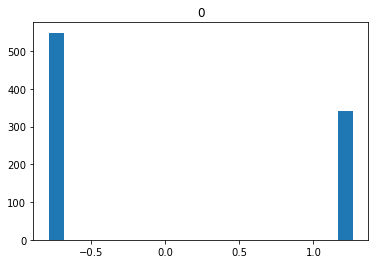

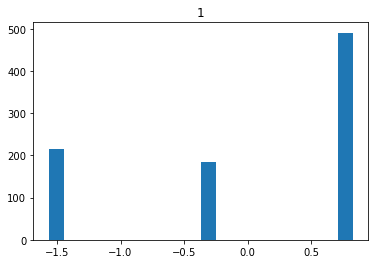

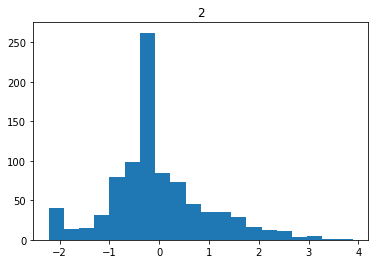

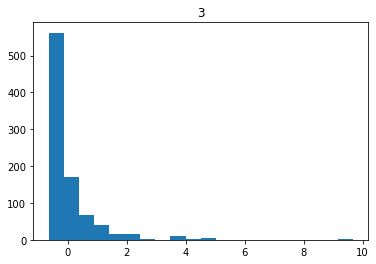

In [30]:
for feature in df_transoformed:
    plt.hist(df_transoformed[feature],bins=20)
    plt.title(feature)
    plt.show()

### Min Max Scaling


1. Mainly used in deep learning in CNN
2. Min Max scaling the values between 0 to 1
3. x_scaled = (x - x.min/(x.man -x.max)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()
# now see each value is converted between 0 to 1

,survived,pclass,age,fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


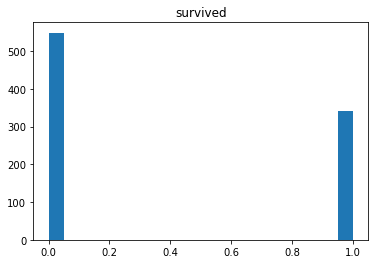

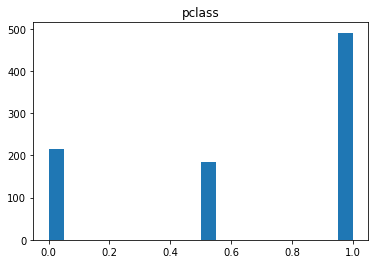

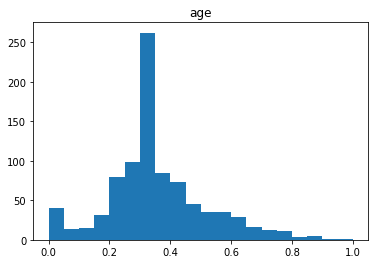

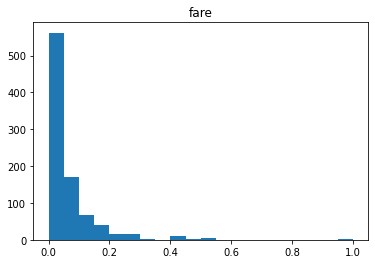

In [35]:
for feature in df_minmax:
    plt.hist(df_minmax[feature], bins=20)
    plt.title(feature)
    plt.show()

### Robust scaler
1. It is used to scale the feature to meadian and quantiles
2. Scaling using meadian and quntiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:
IQR = 75th quantile - 25th quantile

x_scaled = (x-x.median)/IQR

In [36]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [37]:
df_robust

,survived,pclass,age,fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


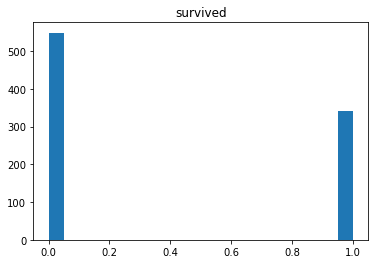

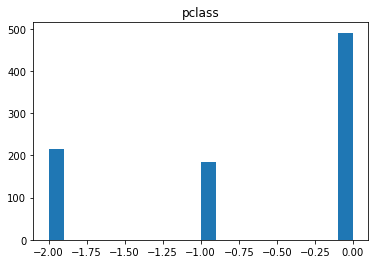

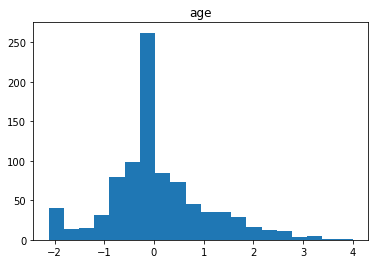

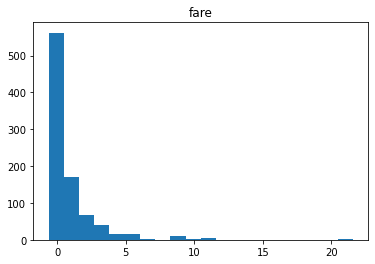

In [38]:
for feature in df_robust:
    plt.hist(df_robust[feature],bins=20)
    plt.title(feature)
    plt.show()

## Guassian Transformation

some machine learning algorithms like linear and logistic assume the features are normally distributed
-Accuracy
-Performance

1. logarithmic transformation
2. reciprocal transformation
3. squareroot transformation
4. exponential transformation(more general, you can use any exponent)
5. boxcox transformation

In [39]:
df = pd.read_csv('titanic.csv',usecols=['survived','age','fare'])

In [41]:
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [42]:
## fill ana values
df['age'].fillna(df['age'].median(),inplace=True)

In [43]:
df.isnull().sum()

survived    0
age         0
fare        0
dtype: int64

In [45]:
import scipy.stats as stat
import pylab

In [47]:
## if we want to check weather features is guassian or normal distribution
## we use commonly Q-Q plot

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2) # first row second col second index
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

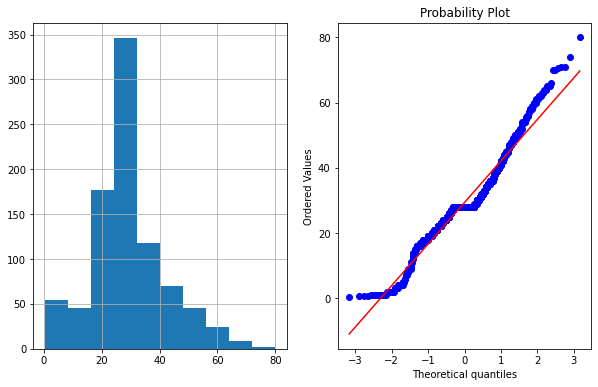

In [48]:
plot_data(df,'age')

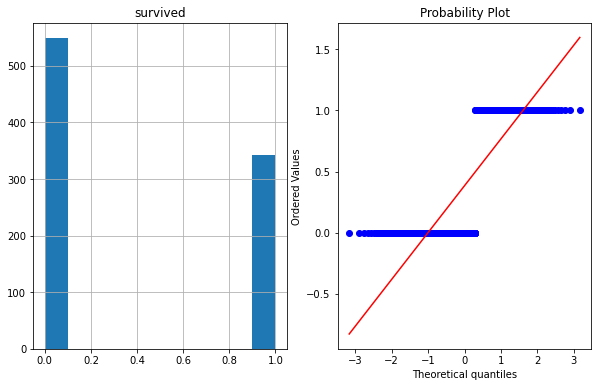

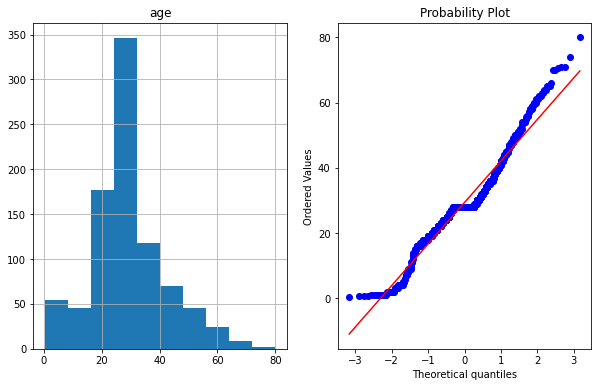

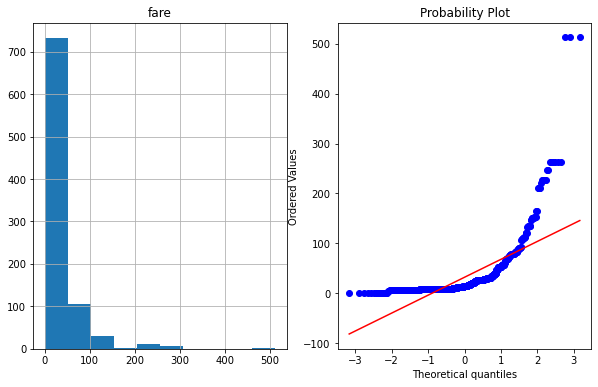

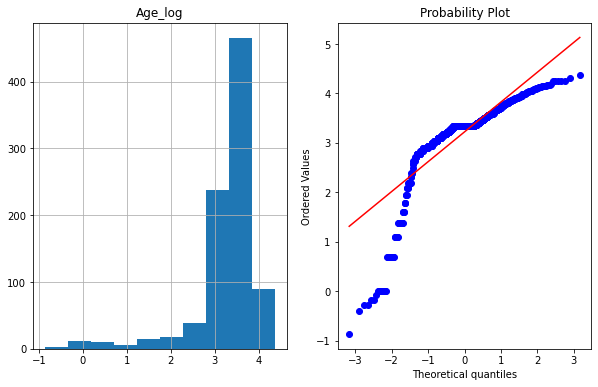

In [52]:
for feature in df:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.title(feature)
    plt.subplot(1,2,2) # first row second col second index
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    
# if most points are fall on the stright line then it is gaussian distribution

### Logarithimic Transformation

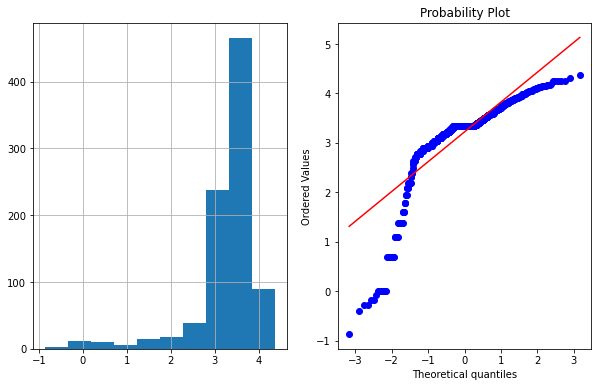

In [53]:
import numpy as np
df['Age_log'] = np.log(df['age'])
plot_data(df,'Age_log')


### Reciprocal Transformation

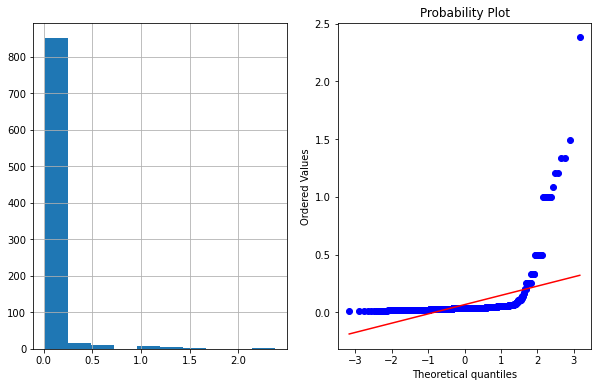

In [54]:
# reciprocal is nothig but 1/feature
df['Age_reciprocal'] = 1/df.age
plot_data(df,'Age_reciprocal')

### SQUAREROOT TRANSFORMATION

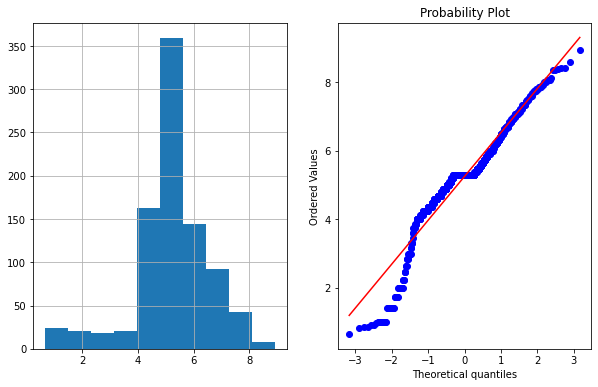

In [55]:
df['age_square'] = df.age**(1/2)
plot_data(df,'age_square')

### Exponential Tranformation

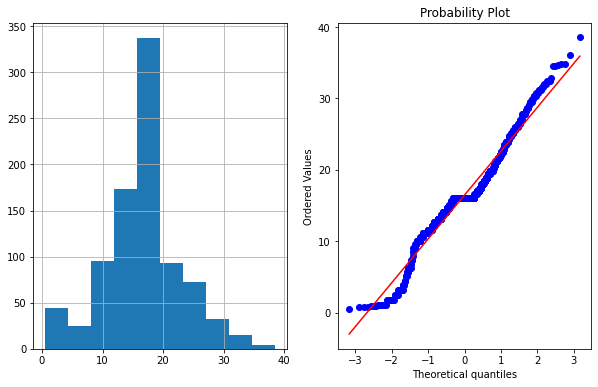

In [56]:
df['Age_exponential'] = df.age**(1/1.2)
plot_data(df,'Age_exponential')

### BOXCOX Transformation

In [58]:
df['Age_boxcox'],parameters = stat.boxcox(df['age'])

In [59]:
print(parameters)

0.7964531473656952


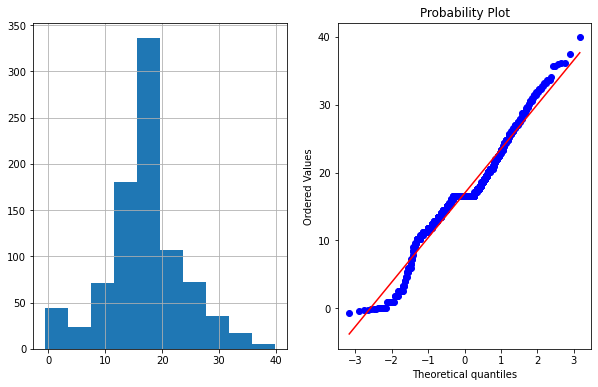

In [60]:
plot_data(df,'Age_boxcox')

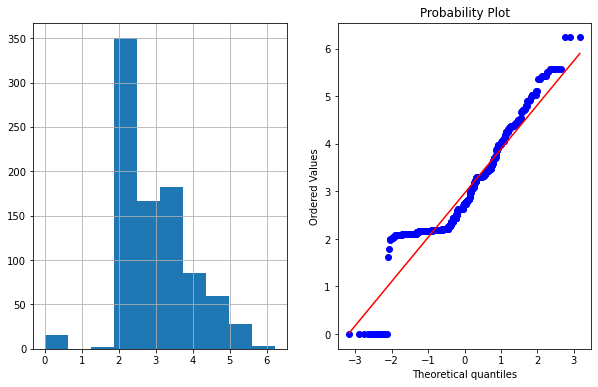

In [61]:
## FARE
df['Fare_log'] = np.log1p(df['fare'])
plot_data(df,'Fare_log')